In [31]:
%load_ext autoreload
%autoreload 2
%aimport mcfost
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
from numpy import unravel_index
import astropy.units as unit
import pysynphot
import os
from sh import gunzip
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator, FixedLocator
from matplotlib import ticker, cm 
from matplotlib import legend_handler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# SED plots dust variation
def sedvar(File_array):
    Irb_array=[]
    l=len(File_array)
    for i in range(0,l):
        #IR Excess
        #filename=File_array[i]+'data_th/sed_rt.fits.gz'
        #gunzip(filename)
        mb=fits.open(File_array[i]+'data_th/sed_rt.fits')
        wavb=mb[1].data
        mb_flux=mb[0].data[0]
        modelb = pysynphot.ArraySpectrum(wavb, mb_flux.flatten(), name='model_b-spectra',fluxunits='flam',waveunits='microns')
        #Star Spectra
        star = fits.open(File_array[i]+'data_th/sed_rt.fits')
        wav=star[1].data
        star_f=star[0].data[1]
        sp = pysynphot.ArraySpectrum(wav, star_f.flatten(), name='Star-spectra',fluxunits='flam',waveunits='microns')
    
        c=2.99792*10**14
        mb_jy=10**26*modelb.flux*modelb.wave/c
        st_jy=10**26*sp.flux*sp.wave/c
        Irb=mb_jy-st_jy
        Irb_array.append(Irb)
    return(Irb_array)

In [33]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/SPC_band/'
sub=['best_SED_DHS/','best_SED_Mie/','best_pSPF/','best_pSPF_dustmass2/']
n=len(sub)
sub_dir=[]
for i in range(0,n):
    d_dir=Main_dir+sub[i]
    sub_dir.append(d_dir)

In [34]:
wav_obs=[4.80,7.80,9.80,10.1,10.3,11.6,12.0,12.5,12.5,18.2,20.0,20.8,24.5,25.0,60.0,100.0,450,800,850]
IR_ex=[0,0.067,0,0.087,0.057,0.086,0.173,0.101,0.133,1.1,1.86,1.813,2.237,3.250,8.630,4.30,0.180,0.028,0.0191]
IR_ex_err=[0,0.037,0,0.026,0.024,0.070,0.028,0.018,0.027,0.150,0,0.170,0.700,0.130,0.430,0.340,0.150,0,0.0034]


In [35]:
file_dir=sub_dir[0]
mb=fits.open(file_dir+'data_th/sed_rt.fits')
wavb=mb[1].data
mb_flux=mb[0].data[0]
modelb = pysynphot.ArraySpectrum(wavb, mb_flux.flatten(), name='model_b-spectra',fluxunits='flam',waveunits='microns')
#Star Spectra
star = fits.open(file_dir+'data_th/sed_rt.fits')
wav=star[1].data
star_f=star[0].data[1]
sp = pysynphot.ArraySpectrum(wav, star_f.flatten(), name='Star-spectra',fluxunits='flam',waveunits='microns')

In [36]:
irb_array=sedvar(sub_dir)

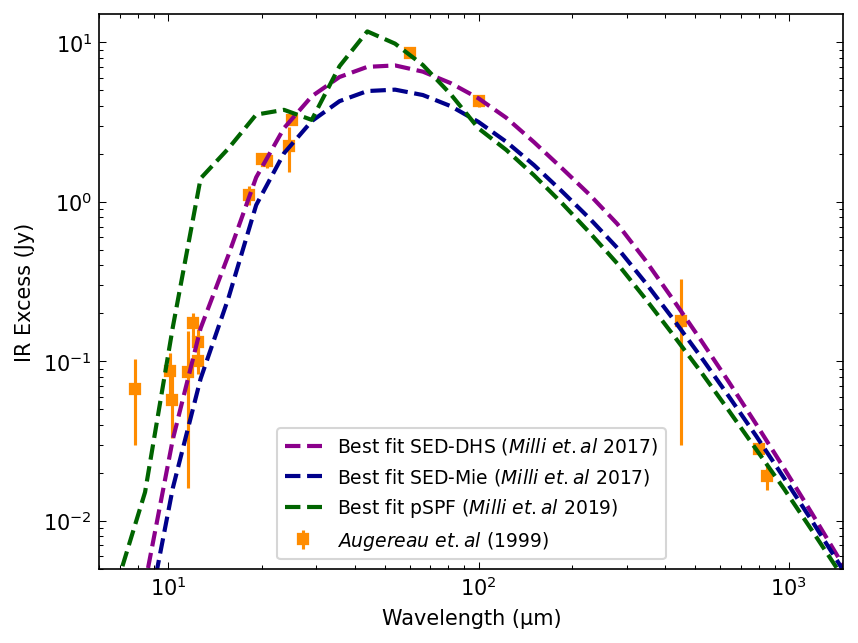

In [37]:
fig=plt.figure(dpi=150)
ax2=fig.add_subplot(111)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5)
ax2.loglog(modelb.wave,irb_array[0],label="Best fit SED-DHS $(Milli~et.al~2017)$",color="darkmagenta",linewidth=2,linestyle='--')
ax2.loglog(modelb.wave,irb_array[1],label="Best fit SED-Mie $(Milli~et.al~2017)$",color="darkblue",linewidth=2,linestyle='--')
ax2.loglog(modelb.wave,irb_array[2],label='Best fit pSPF $(Milli~et.al~2019)$',color="darkgreen",linewidth=2,linestyle='--')
ax2.errorbar(wav_obs,IR_ex,yerr=IR_ex_err,ls='None',marker='s',ms=3, mew=3,label="$Augereau~et.al~(1999)$",mfc='darkorange',mec='darkorange',ecolor='darkorange',zorder=0)
ax2.set_xlim([6,1500])
ax2.set_ylim([0.005,15])
ax2.set_xlabel('Wavelength (\u03BCm)')
ax2.set_ylabel('IR Excess (Jy)')
ax2.legend(loc='lower center',fontsize=9)
#fig.savefig(Main_dir+'IR_excess_HR4796A.pdf', format='pdf', bbox_inches='tight')

In [38]:
def scat_phas(file_array):
    scatph_wav_list=[]
    pol_wav_list=[]
    fdir=file_array
    l=len(file_array)
    for i in range (l):
        phase_func=fits.getdata(fdir[i]+'phase_function.fits')
        pol=fits.getdata(fdir[i]+'polarizability.fits')
        lam_mie=fits.getdata(fdir[i]+'lambda.fits')
        scatph_wav=phase_func[1:181,10]
        pol_wav=pol[1:181,10]
        
        scatph_wav_list.append(scatph_wav)
        pol_wav_list.append(pol_wav)
        
       
    return(scatph_wav_list,pol_wav_list)

In [39]:
lam_mie=fits.getdata(phase_dir[0]+'lambda.fits')
lam_mie

array([1.10859066e-01, 1.36242822e-01, 1.67438790e-01, 2.05777779e-01,
       2.52895385e-01, 3.10801655e-01, 3.81966919e-01, 4.69427109e-01,
       5.76913357e-01, 7.09011078e-01, 8.71355653e-01, 1.07087278e+00,
       1.31607389e+00, 1.61741960e+00, 1.98776543e+00, 2.44291043e+00,
       3.00227165e+00, 3.68971133e+00, 4.53455639e+00, 5.57284832e+00,
       6.84888172e+00, 8.41709232e+00, 1.03443813e+01, 1.27129669e+01,
       1.56238966e+01, 1.92013512e+01, 2.35979462e+01, 2.90012436e+01,
       3.56417503e+01, 4.38027573e+01, 5.38324165e+01, 6.61585999e+01,
       8.13071518e+01, 9.99243088e+01, 1.22804298e+02, 1.50923203e+02,
       1.85480576e+02, 2.27950653e+02, 2.80145264e+02, 3.44291016e+02,
       4.23124451e+02, 5.20008606e+02, 6.39076660e+02, 7.85408081e+02,
       9.65245544e+02, 1.18626086e+03, 1.45788293e+03, 1.79169910e+03,
       2.20195020e+03, 2.70613770e+03], dtype=float32)

In [40]:
phase_dir=[]
for i in range(0,n):
    d_dir=Main_dir+sub[i]+'data_dust/'
    phase_dir.append(d_dir)

In [41]:
dust_prop=scat_phas(phase_dir)
scat=dust_prop[0]
pol=dust_prop[1]

In [30]:
np.max(pol[1])

0.93287337

In [42]:
theta=np.arange(0,180,1)

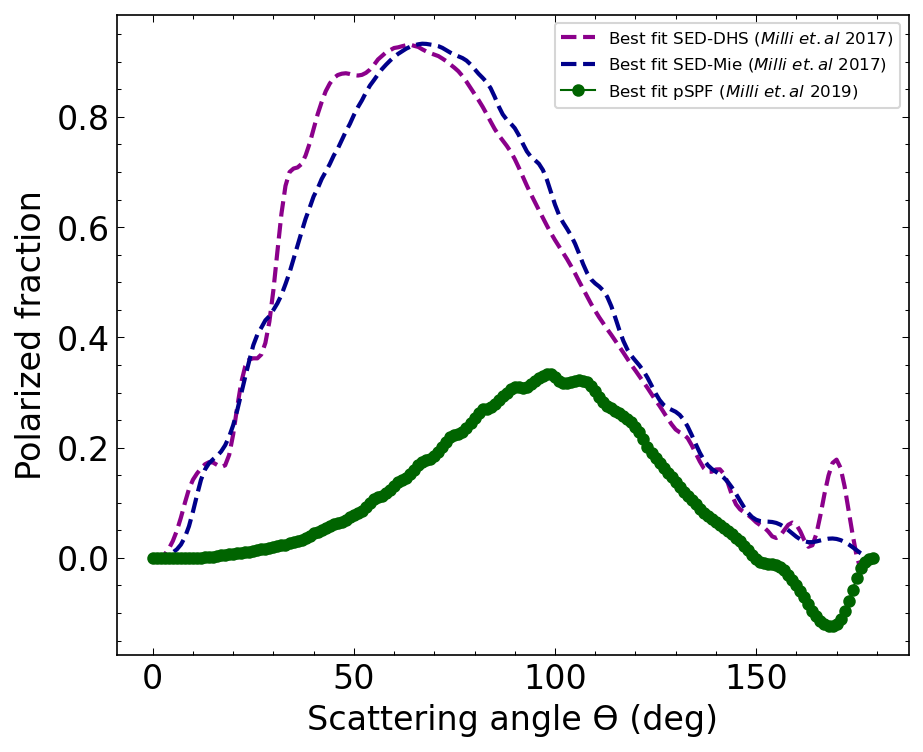

In [43]:

#ax2=fig.add_subplot(121)
#ax2.yaxis.set_ticks_position('both')
#ax2.xaxis.set_ticks_position('both')
#ax2.minorticks_on()
#ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
#ax2.semilogy(scat[0],'--',label='Best fit SED-DHS (Milli et al 2017)',linewidth=3,color="darkmagenta")
#ax2.semilogy(scat[1],'--',label='Best fit SED-Mie (Milli et al 2017)',linewidth=3,color="darkblue")
#ax2.semilogy(theta,scat[2],marker='o',label='Best fit pSPF:$M_{dust}=1e^{-6}M_{\odot}$\n(Milli et al 2019)',color="darkgreen", ms=10)
#ax2.semilogy(scat[3],'-',label='Best fit pSPF:$M_{dust}=1e^{-9}M_{\odot}$\n(Milli et al 2019) ',linewidth=2,color="olive")
#ax2.set_ylabel('Scattering Phase function',fontsize=16)
#ax2.set_xlabel('Scattering angle \u03F4 (deg)',fontsize=16)
#ax2.set_title('Scattering phase function',fontsize=16)
#ax2.legend(loc='upper right',fontsize=16)
#ax2.xaxis.set_major_formatter(mticker.ScalarFormatter())
#ax2.ticklabel_format(style='plain',axis='x')

fig=plt.figure(dpi=150)
ax3=fig.add_subplot(111)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax3.plot(pol[0],'--',linewidth=2,color="darkmagenta",label ='Best fit SED-DHS $(Milli~et.al~2017)$')
ax3.plot(pol[1],'--',linewidth=2,color="darkblue",label='Best fit SED-Mie $(Milli~et.al~2017)$')
ax3.plot(theta,pol[2],marker='o',linewidth=1,color="darkgreen",ms=5,label='Best fit pSPF $(Milli~et.al~2019)$')
#ax3.plot(pol[3],'-',linewidth=2,color="olive",label='Best fit pSPF: $M_{dust}=1e^{-9}M_{\odot}$\n $Milli~et.al~(2019)$')
ax3.set_ylabel('Polarized fraction',fontsize=16)
ax3.set_xlabel('Scattering angle \u03F4 (deg)',fontsize=16)
#ax3.set_title('Scattering polarization',fontsize=16)
ax3.legend(loc='upper right',fontsize=8)
ax3.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.ticklabel_format(style='plain',axis='x')
fig.subplots_adjust(hspace=0.2, wspace=0.2, top=1, right=0.95)
fig.savefig(Main_dir+'polarized_frac_HR4796A.pdf', format='pdf', bbox_inches='tight')

In [18]:
pobs=[0.4]
perr=[0.26]
th=[90]

In [19]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/'
fig_dir=Main_dir+'Figures/'

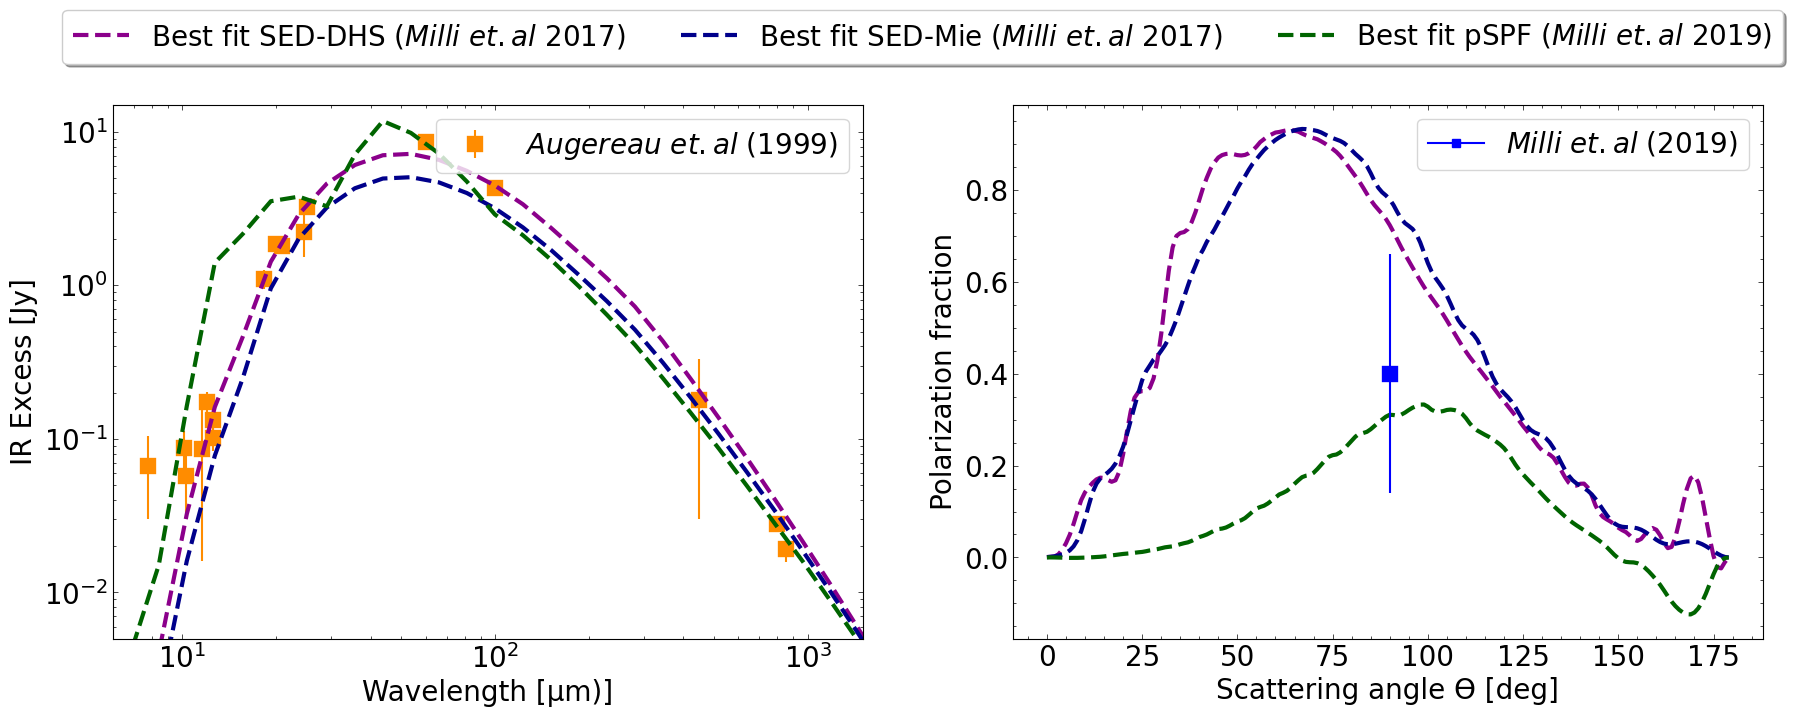

In [45]:
fig=plt.figure(figsize=(20, 6))
ax2=fig.add_subplot(121)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5,labelsize=20)
ax2.loglog(modelb.wave,irb_array[0],color="darkmagenta",linestyle='--',linewidth=3)
ax2.loglog(modelb.wave,irb_array[1],color="darkblue",linestyle='--',linewidth=3)
ax2.loglog(modelb.wave,irb_array[2],color="darkgreen",linestyle='--',linewidth=3)
ax2.errorbar(wav_obs,IR_ex,yerr=IR_ex_err,ls='None',marker='s',ms=6, mew=6,label="$Augereau~et.al~(1999)$",mfc='darkorange',mec='darkorange',ecolor='darkorange',zorder=0)
ax2.set_xlim([6,1500])
ax2.set_ylim([0.005,15])
ax2.set_xlabel('Wavelength [\u03BCm)]',fontsize=20)
ax2.set_ylabel('IR Excess [Jy]',fontsize=20)
ax2.legend(loc='upper right',fontsize=20)

ax3=fig.add_subplot(122)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=20)
line1,=ax3.plot(pol[0],'--',linewidth=3,color="darkmagenta",label ='Best fit SED-DHS $(Milli~et.al~2017)$')
line2,=ax3.plot(pol[1],'--',linewidth=3,color="darkblue",label='Best fit SED-Mie $(Milli~et.al~2017)$')
line3,=ax3.plot(theta,pol[2],linestyle='--',linewidth=3,color="darkgreen",ms=5,label='Best fit pSPF $(Milli~et.al~2019)$')
line4,=ax3.plot(th,pobs,marker='s',color='blue',label="$Milli~et.al~(2019)$")
ax3.errorbar(th,pobs,yerr=perr,ls=None,color='blue',marker='s',ms=6, mew=6)
ax3.set_ylabel('Polarization fraction',fontsize=20)
ax3.set_xlabel('Scattering angle \u03F4 [deg]',fontsize=20)
ax3.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.ticklabel_format(style='plain',axis='x')
legend1=ax3.legend(handles=[line1,line2,line3],loc='lower center', bbox_to_anchor=(-0.12, 1.05),
          ncol=3, fancybox=True, shadow=True,fontsize=20)
ax3.add_artist(legend1)
ax3.legend(handles=[line4],loc='upper right',fontsize=20)
fig.subplots_adjust(hspace=0.2, wspace=0.2, top=1, right=0.95)
fig.savefig(fig_dir+'IR_excess_polarized_frac_HR4796A.pdf', format='pdf', bbox_inches='tight')